##### 案例：使用SVM进行人脸识别

In [26]:
# 下载数据
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(data_home='.',min_faces_per_person=60)

In [32]:
print(faces.data.shape)
print(faces.target_names)
print(faces.images.shape)
from collections import Counter

print(Counter(faces.target))

(1348, 2914)
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
Counter({np.int64(3): 530, np.int64(1): 236, np.int64(7): 144, np.int64(2): 121, np.int64(4): 109, np.int64(0): 77, np.int64(5): 71, np.int64(6): 60})


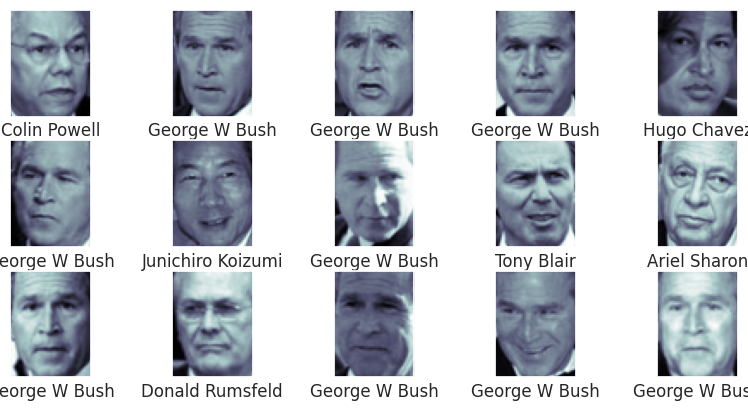

In [11]:
# 可视化需要训练的数据
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
fig, ax = plt.subplots(3,5)
fig.subplots_adjust(left=0.0625, right=1.2, wspace=1)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

In [12]:
# 使用主成分分析提取主要的特征用于训练
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel='rbf')
model = make_pipeline(pca,svc)

In [13]:
# 划分训练集与验证集进行交叉验证
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state=42)

In [14]:
# 网格化搜索最优参数组合
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)

grid.fit(x_train,y_train)


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [15]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [16]:
model = grid.best_estimator_
y_fit = model.predict(x_test)

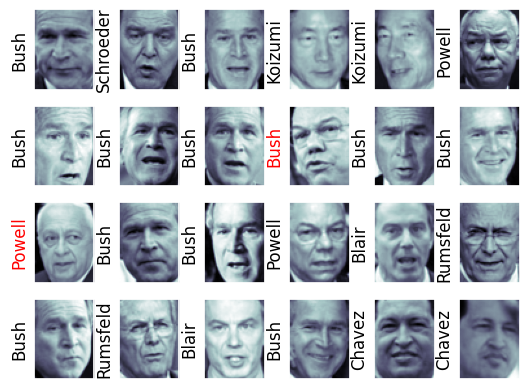

In [23]:
# 比较预测结果和真实结果
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],color='black' if y_fit[i]==y_test[i] else 'red') # 预测错误的名字用红色标注

In [24]:
# 打印分类效果报告：列举每个标签的统计结果
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.86      0.88      0.87        68
  Donald Rumsfeld       0.85      0.71      0.77        31
    George W Bush       0.82      0.94      0.88       126
Gerhard Schroeder       0.95      0.78      0.86        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.90      0.90      0.90        42

         accuracy                           0.86       337
        macro avg       0.91      0.81      0.85       337
     weighted avg       0.87      0.86      0.86       337



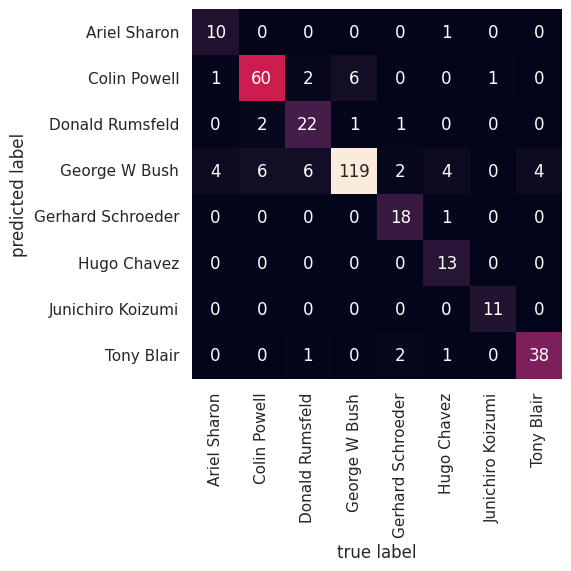

In [29]:
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()